In [1]:
%load_ext zipline
%matplotlib inline
%config InlineBackend.figure_format = 'png'

Entire data start date: 2019-06-03
Entire data end date: 2020-11-27
Backtest months: 18


,Backtest
Annual return,0.4%
Cumulative returns,0.6%
Annual volatility,0.6%
Sharpe ratio,0.70
Calmar ratio,0.73
Stability,0.72
Max drawdown,-0.5%
Omega ratio,1.21
Sortino ratio,1.08
Skew,0.95


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.54,2020-07-15,2020-07-21,NaT,NaN
1,0.22,2020-01-30,2020-03-18,2020-06-25,106
2,0.12,2019-11-19,2019-12-12,2020-01-21,46
3,0.10,2020-06-29,2020-06-30,2020-07-08,8
4,0.07,2020-01-22,2020-01-27,2020-01-30,7


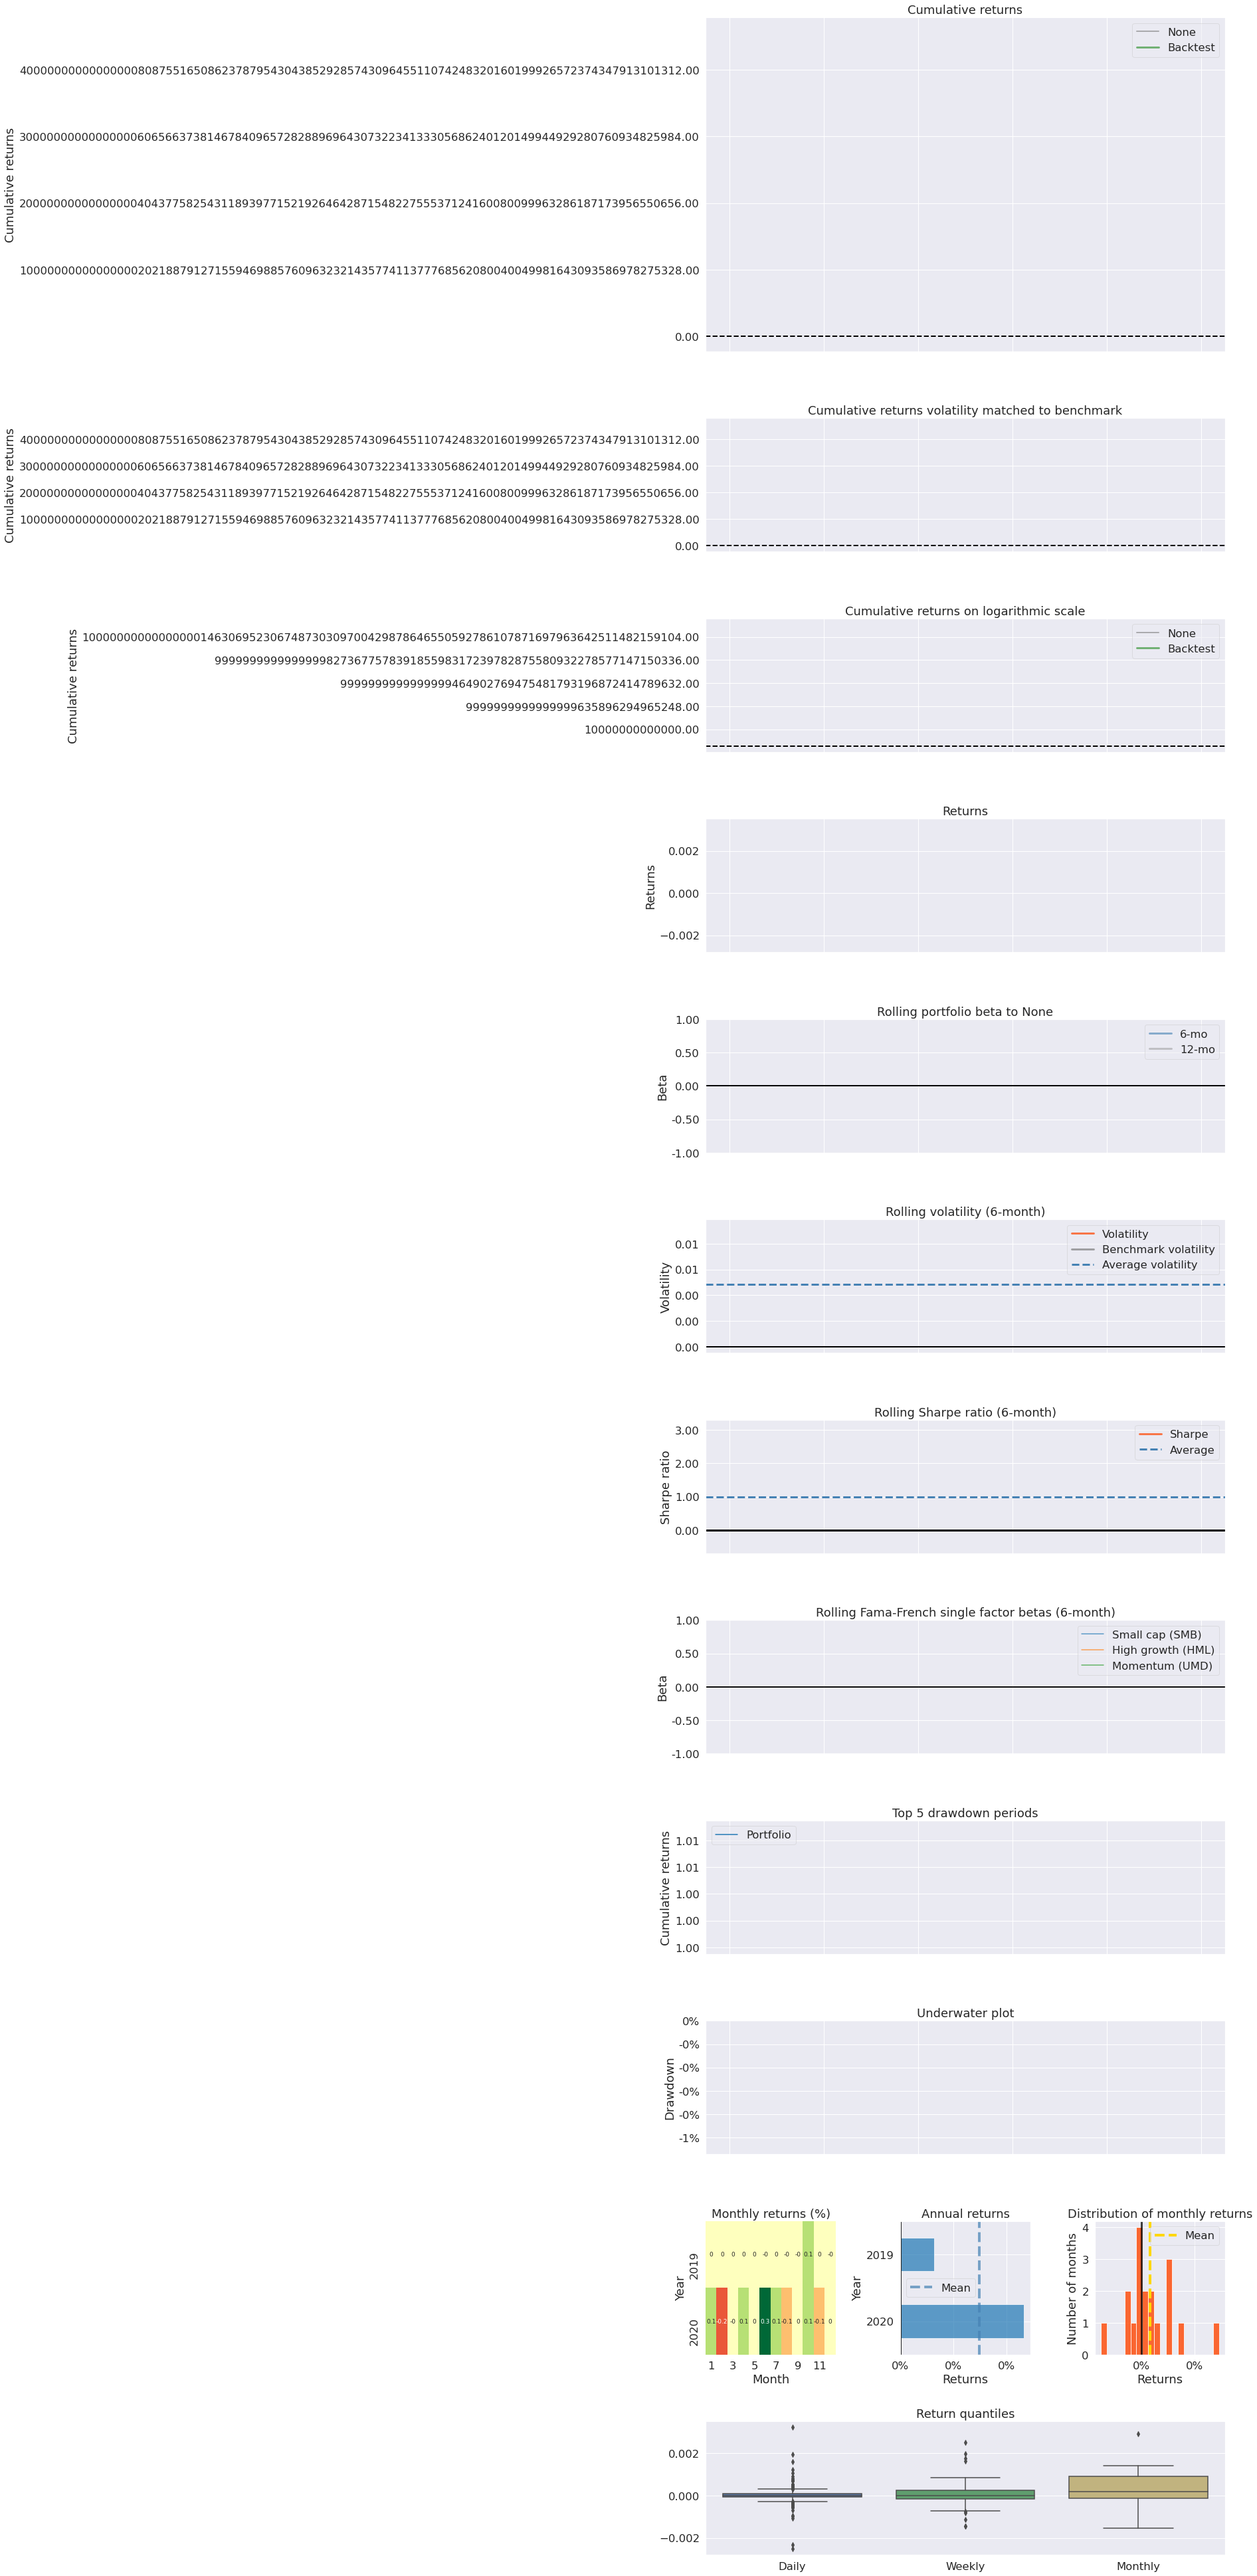

Stress Events,mean,min,max
New Normal,0.00%,-0.25%,0.32%


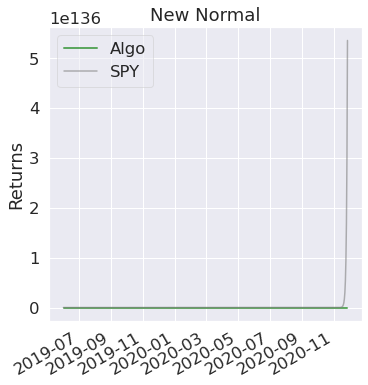

Top 10 long positions of all time,max
NTAR,0.96%


Top 10 short positions of all time,max


Top 10 positions of all time,max
NTAR,0.96%


All positions ever held,max
NTAR,0.96%


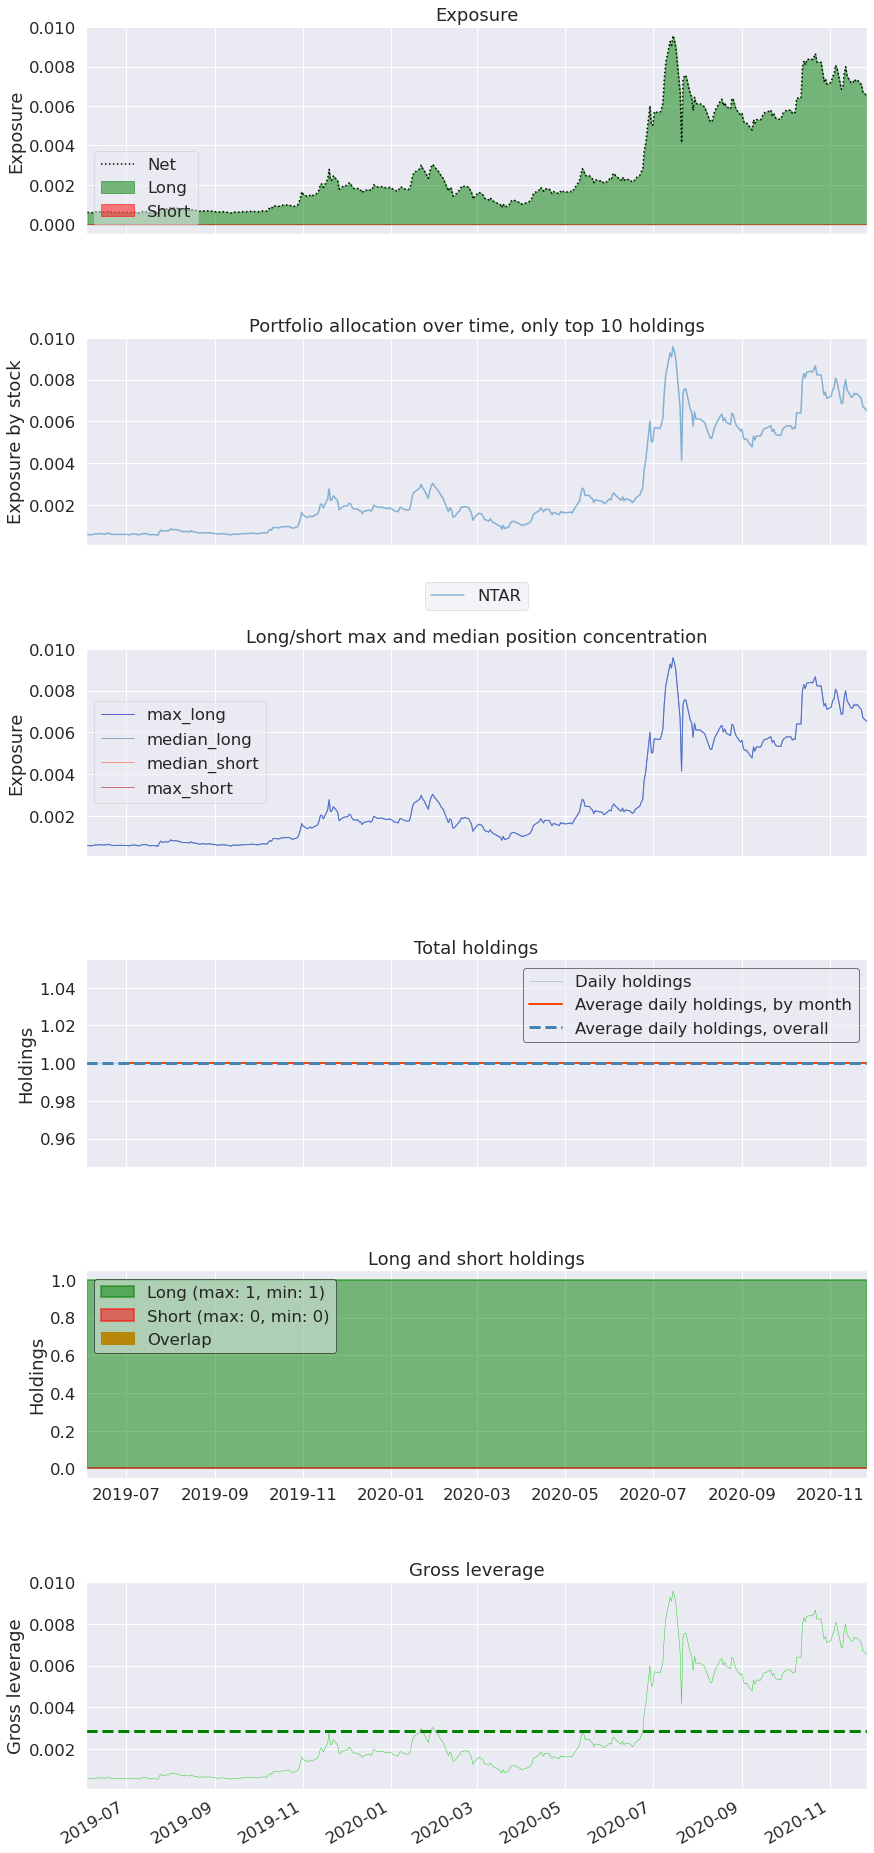

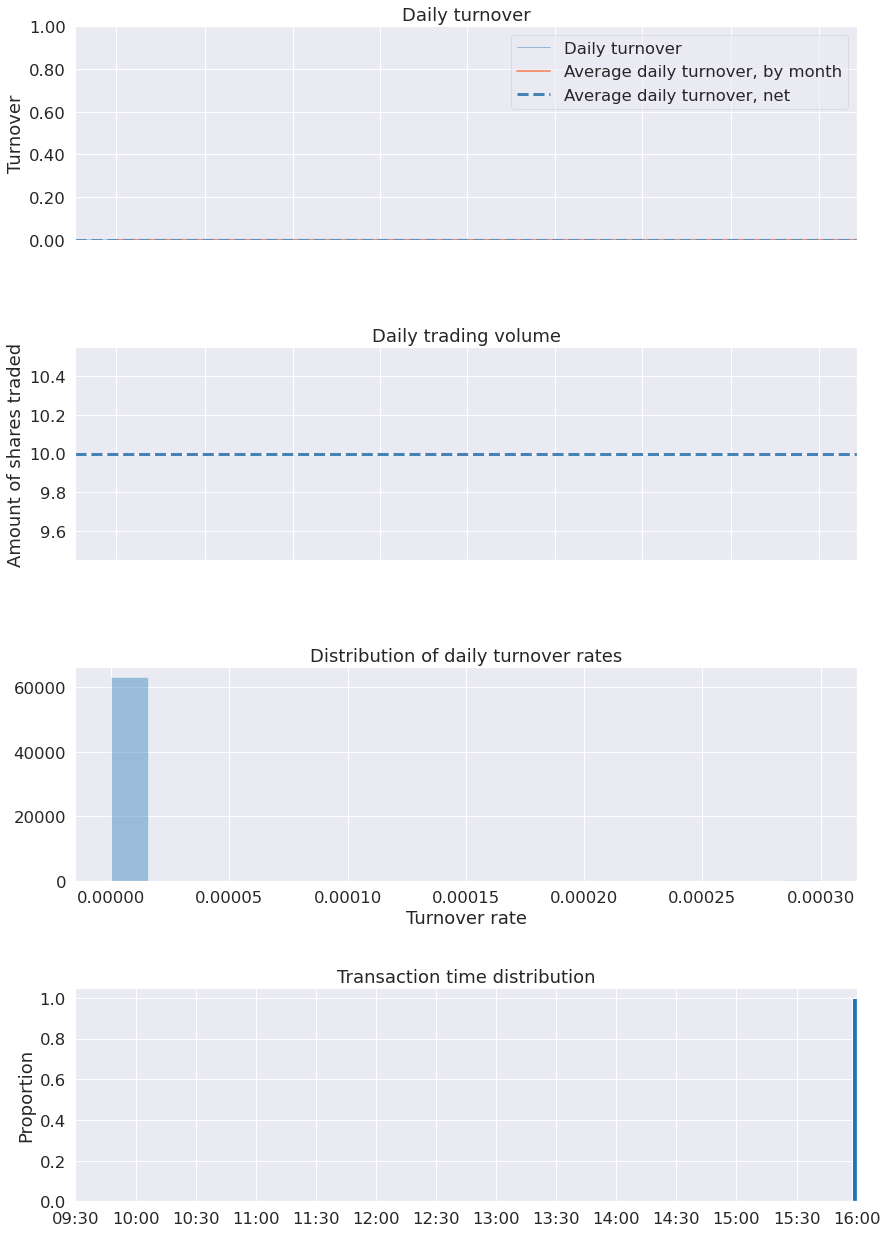

In [8]:
from zipline.api import order, symbol, record, set_benchmark
from zipline import run_algorithm
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio as pf
from datetime import datetime
import pytz
# parameters
selected_stock = 'NTAR'
n_stocks_to_buy = 10

def initialize(context):
    set_benchmark(symbol('IDK'))
    context.asset = symbol('NTAR')
    context.has_ordered = False  

def handle_data(context, data):
    # record price for further inspection
    record(price=data.current(symbol(selected_stock), 'price'))
    
    # trading logic
    if not context.has_ordered:
        # placing order, negative number for sale/short
        order(symbol(selected_stock), n_stocks_to_buy)
        # setting up a flag for holding a position
        context.has_ordered = True


def analyze(context, perf):
    # Use PyFolio to generate a performance report
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
    # pf.create_returns_tear_sheet(returns, benchmark_rets=None)
    start_ref = datetime(2019, 6, 1, 0, 0, 0, 0, pytz.utc)
    end_ref = datetime(2020, 11, 27, 0, 0, 0, 0, pytz.utc)
    benchmark_rets=pd.Series(0,index=pd.date_range(start_ref,end_ref), dtype="float64")
    pf.create_full_tear_sheet(returns, benchmark_rets=benchmark_rets, positions=positions, transactions=transactions)

# Set start and end date
# start_date = datetime(2019, 9, 3, tzinfo=pytz.UTC)
# end_date = datetime(2020, 11, 27, tzinfo=pytz.UTC)
# pandas compilant timestamp
# need to start early because of 100 day rolling window
start_date = pd.Timestamp('2019-06-01', tz='utc')
end_date = pd.Timestamp('2020-11-27', tz='utc')
# Fire off the backtest
results = run_algorithm(
    start=start_date, 
    end=end_date, 
    initialize=initialize, 
    analyze=analyze, 
    handle_data=handle_data, 
    capital_base=10000, 
    bundle='bt_ntaridk' 
)